<a href="https://colab.research.google.com/github/70ekanetugu/MLColab/blob/main/colab_sample/linear_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
from sklearn import datasets

california = datasets.fetch_california_housing()
california_df = pd.DataFrame(california.data, columns=california.feature_names)
print(california.DESCR)
california_df["PRICE"] = california.target # 住宅価格が目的変数(単位: $100,000)
california_df.head()

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [12]:
california_df.describe() # 統計量

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [15]:
# 訓練データとテストデータに分割
from sklearn.model_selection import train_test_split

x_train, x_test, t_train, t_test = train_test_split(california.data, california.target, random_state=0)


回帰係数:  [0.0700324]
切片:  1.6939202573401806


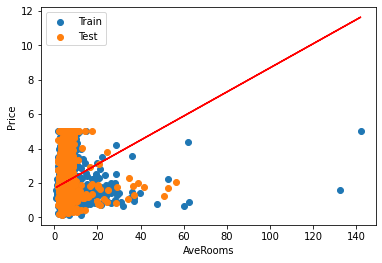

MSE(Train):  1.3031648537601064
MSE(Test):  1.293874937808395
MSE(Train):  0.5192270684511334
MSE(Test):  0.5404128061709091


In [40]:
# 単回帰
from sklearn import linear_model
import matplotlib.pyplot as plt

x_rm_train = x_train[:, [2]]
x_rm_test = x_test[:, [2]]

model = linear_model.LinearRegression() # 線形回帰モデルを使用
model.fit(x_rm_train, t_train) # 学習

print("回帰係数: ", model.coef_)
print("切片: ", model.intercept_)
y_reg = model.coef_ * x_rm_train + model.intercept_ # 学習結果から回帰直線

plt.scatter(x_rm_train, t_train, label="Train")
plt.scatter(x_rm_test, t_test, label="Test")
plt.plot(x_rm_train, y_reg, c="red")
plt.xlabel("AveRooms")
plt.ylabel("Price")
plt.legend()
plt.show()

from sklearn.metrics import mean_squared_error

y_train = model.predict(x_rm_train)
mse_train = mean_squared_error(t_train, y_train)
print("MSE(Train): ", mse_train) # 損失関数で訓練データによる誤差を算出

y_test = model.predict(x_rm_test)
mse_test = mean_squared_error(t_test, y_test)
print("MSE(Test): ", mse_test) # 損失関数でテストデータによる誤差を算出

# 重回帰(ここではすべての説明変数を使う)
model = linear_model.LinearRegression() # 線形回帰
model.fit(x_train, t_train) # 全ての説明変数を使って学習する

a_df = pd.DataFrame(california.feature_names, columns=["Exp"])
a_df["a"] = pd.Series(model.coef_) # 係数

y_train = model.predict(x_train)
mse_train = mean_squared_error(t_train, y_train)
print("MSE(Train): ", mse_train)

y_test = model.predict(x_test)
mse_test = mean_squared_error(t_test, y_test)
print("MSE(Test): ", mse_test)